In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
FILE_PATH = 'Dataset/Stroke.csv'
df=pd.read_csv(FILE_PATH)

# Exploratory Data Analysis

In [3]:
df.shape

(5110, 12)

In [4]:
df.columns.values

array(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'], dtype=object)

In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.nunique(axis=0)

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [8]:
df = df.dropna()

<Axes: >

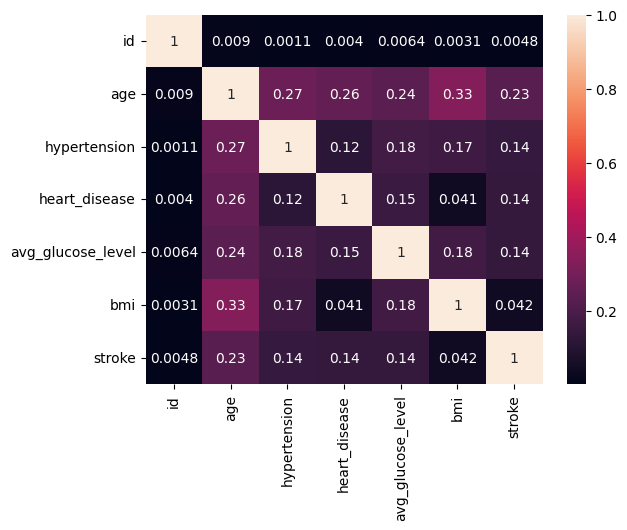

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

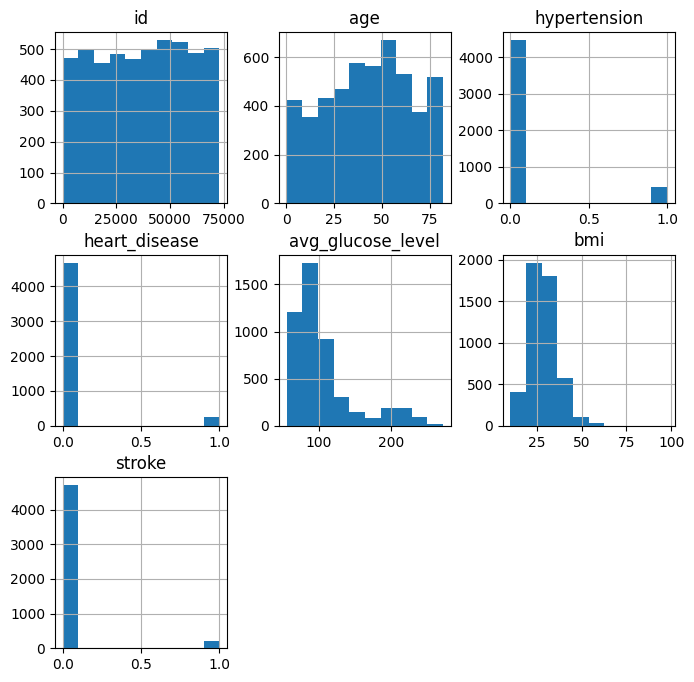

In [10]:
df.hist(figsize=(8,8))
plt.title('Histograms of Features')
plt.show()

# Logistic Regression

In [11]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [12]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 4, 5, 6, 9])], remainder='passthrough')
x = ct.fit_transform(x)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [15]:
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [16]:
print("Logistic Regression Accuracy: {:.2f}%".format(logistic_classifier.score(x_test, y_test)*100))

Logistic Regression Accuracy: 94.81%


In [17]:
from sklearn.metrics import confusion_matrix

y_pred = logistic_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[931   0]
 [ 51   0]]


AUC for Logistic Regression: 0.8589962300709757


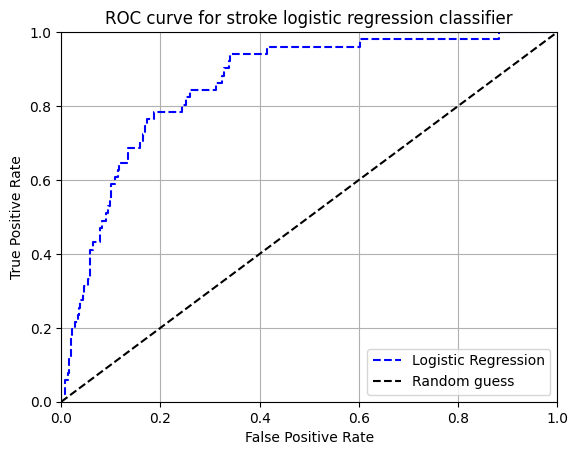

In [18]:
y_pred_prob = logistic_classifier.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, 'b--', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.legend()
plt.title('ROC curve for stroke logistic regression classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

print("AUC for Logistic Regression:", roc_auc_score(y_test, y_pred_prob[:, 1]))

# KNN with different K

In [19]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [20]:
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 4, 5, 6, 9])], remainder='passthrough')
x = ct.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Number of Neighbors: 100
Accuracy: 0.9562118126272913
AUC: 0.7826485375337444

Number of Neighbors: 200
Accuracy: 0.9562118126272913
AUC: 0.7976942318646755

Number of Neighbors: 300
Accuracy: 0.9562118126272913
AUC: 0.8053842534115958

Number of Neighbors: 400
Accuracy: 0.9562118126272913
AUC: 0.7927533001461228

Number of Neighbors: 500
Accuracy: 0.9562118126272913
AUC: 0.7895584119672091



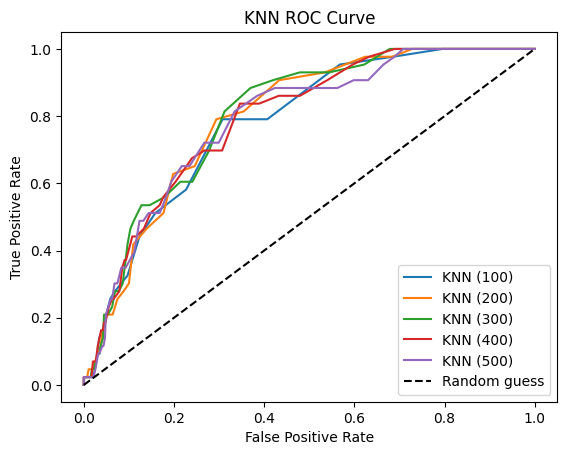

In [23]:
for neighbours in range(100, 501, 100):
    knn = KNeighborsClassifier(n_neighbors=neighbours)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = knn.score(x_test, y_test)

    y_pred_proba = knn.predict_proba(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    plt.plot(fpr, tpr, label=f'KNN ({neighbours})')
    print("Number of Neighbors:", neighbours)
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print()

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend()
plt.show()